# TASK 4

# RECOMMENDATION SYSTEM

## Create a simple recommendation system that suggests items tousers based on their preferences. You can use techniques like collaborative filtering or content-based filtering to recommend movies, books, or products to users.

In [14]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the dataset 
books = pd.read_csv("Books.csv", encoding="ISO-8859-1",dtype={
        "ISBN": str,
        "Book-Title": str,
        "Book-Author": str,
        "Year-Of-Publication": str, 
        "Publisher": str,
        "Image-URL-S": str,
        "Image-URL-M": str,
        "Image-URL-L": str,
    })
ratings = pd.read_csv("Ratings.csv", encoding="ISO-8859-1")

In [16]:
# Basic EDA 
def perform_eda(books, ratings):
    
    
    # General Info about the datasets
    print("Books Dataset Info:")
    print(books.info())
    print("\nRatings Dataset Info:")
    print(ratings.info())
    
    # Show top rows of the books and ratings data
    print("\nFirst 5 rows of books:")
    print(books.head())
    print("\nFirst 5 rows of ratings:")
    print(ratings.head())
    
    # Number of unique books, users, and ratings
    print("\nUnique books:", len(books["ISBN"].unique()))
    print("Unique users:", len(ratings["User-ID"].unique()))
    print("Total ratings:", len(ratings))
    
    # Plot the distribution of ratings
    plt.figure(figsize=(10, 6))
    sns.histplot(ratings["Book-Rating"], bins=5, kde=False, color="blue")
    plt.title("Distribution of Ratings")
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.show()
    
    # Plot the number of ratings per book
    book_rating_counts = ratings.groupby("ISBN").size()
    plt.figure(figsize=(10, 6))
    sns.histplot(book_rating_counts, kde=False, color="green")
    plt.title("Number of Ratings per Book")
    plt.xlabel("Number of Ratings")
    plt.ylabel("Count of Books")
    plt.show()
    
    # Plot the number of ratings per user
    user_rating_counts = ratings.groupby("User-ID").size()
    plt.figure(figsize=(10, 6))
    sns.histplot(user_rating_counts, kde=False, color="orange")
    plt.title("Number of Ratings per User")
    plt.xlabel("Number of Ratings")
    plt.ylabel("Count of Users")
    plt.show()

In [17]:
# Filter books and ratings to reduce dataset size 
popular_books = ratings["ISBN"].value_counts().head(100).index 
filtered_books = books[books["ISBN"].isin(popular_books)]
filtered_ratings = ratings[ratings["ISBN"].isin(popular_books)]

In [19]:
# Merge books and ratings 
merged_data = pd.merge(filtered_ratings, filtered_books, on="ISBN")

In [20]:
# Content-Based Recommendation
def recommend_books_by_author(book_title, books, top_n=5):
    
    # Get the author of the selected book
    author = books[books["Book-Title"] == book_title]["Book-Author"].values[0]
    
    # Find other books by the same author
    recommendations = books[books["Book-Author"] == author]
    recommendations = recommendations[recommendations["Book-Title"] != book_title]
    return recommendations[["Book-Title", "Book-Author"]].head(top_n)


In [21]:
# Collaborative Filtering
def recommend_books_by_users(user_id, ratings, books, top_n=5):
    
    # Find books rated by the user
    user_books = ratings[ratings["User-ID"] == user_id]["ISBN"].tolist()
    
    # Find other users who rated the same books
    similar_users = ratings[ratings["ISBN"].isin(user_books)]["User-ID"].unique()
    similar_users = [u for u in similar_users if u != user_id]
    
    # Get books rated by similar users but not by the target user
    recommendations = ratings[ratings["User-ID"].isin(similar_users)]
    recommendations = recommendations[~recommendations["ISBN"].isin(user_books)]
    
    # Recommend the most rated books
    top_books = recommendations["ISBN"].value_counts().head(top_n).index
    return books[books["ISBN"].isin(top_books)][["Book-Title", "Book-Author"]]


In [22]:
# Visualize Most Popular Books
def plot_popular_books(books, ratings, top_n=10):
    
    top_books = ratings["ISBN"].value_counts().head(top_n).index
    book_titles = books[books["ISBN"].isin(top_books)]["Book-Title"].values
    counts = ratings["ISBN"].value_counts().head(top_n).values

    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=book_titles, palette="viridis")
    plt.title("Top Rated Books", fontsize=16)
    plt.xlabel("Number of Ratings", fontsize=12)
    plt.ylabel("Book Titles", fontsize=12)
    plt.show()


Performing EDA on Books and Ratings Datasets:
Books Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None

Ratings Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN    

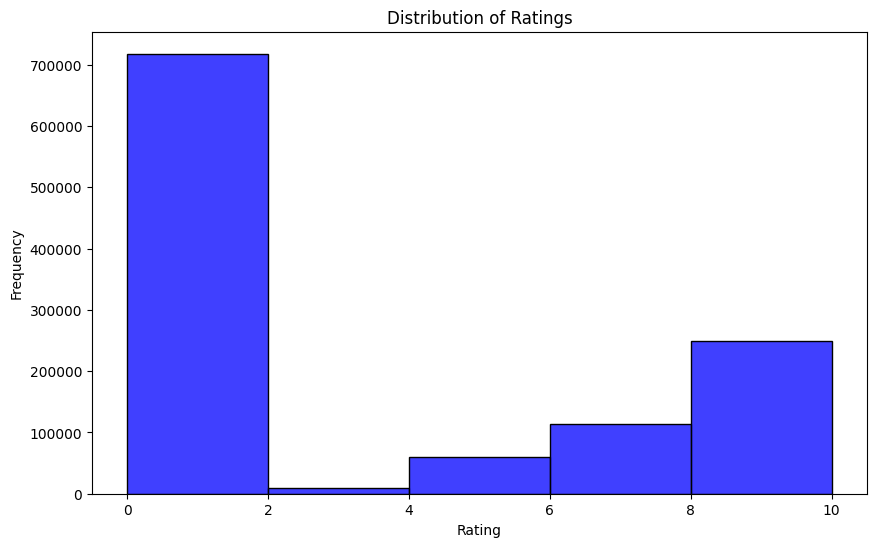

In [ ]:
print("\nPerforming EDA on Books and Ratings Datasets:")
perform_eda(books, ratings)

print("\nContent-Based Recommendations for 'The Da Vinci Code':")
print(recommend_books_by_author("The Da Vinci Code", filtered_books, top_n=5))

print("\nCollaborative Filtering Recommendations for User 276725:")
print(recommend_books_by_users(276725, filtered_ratings, filtered_books, top_n=5))



In [ ]:
# Plot the most popular books
print("\nVisualizing the Most Popular Books:")
plot_popular_books(filtered_books, filtered_ratings, top_n=10)